# Machine Learning Assignment 2
## Naive Bayes and KNN

Murari Sreekumar CSE B 3122235001087

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import math
from matplotlib import rcParams
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
rcParams['font.family']='Liberation Sans'
rcParams['font.weight']='bold'
rcParams['font.size']=15
rcParams['axes.labelweight']='bold'
rcParams['axes.titleweight']='bold'
rcParams['xtick.labelsize']=15
rcParams['ytick.labelsize']=15
from sklearn.model_selection import learning_curve

**Data Importing and Preprocessing**

In [5]:
df=pd.read_csv("spambase_csv_Kaggle.csv")
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [6]:
df.head()
df.info()
df.describe()
df.columns
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

(4601, 58)

In [88]:
df=df.drop_duplicates()
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


**Class Distribution**

<Axes: xlabel='class', ylabel='count'>

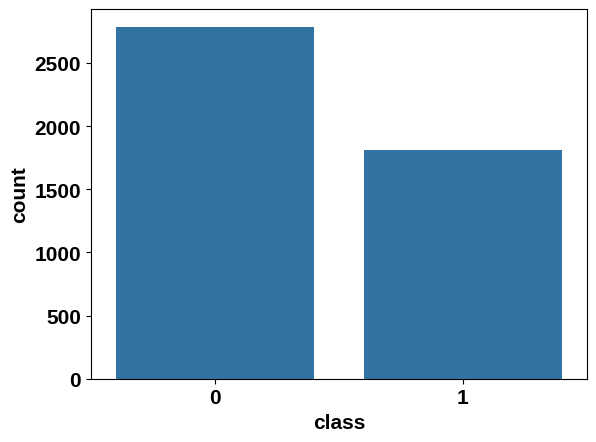

In [8]:
sns.countplot(data=df,x="class")

**Feature Distribution (EDA Subplots)**



**Histogram**

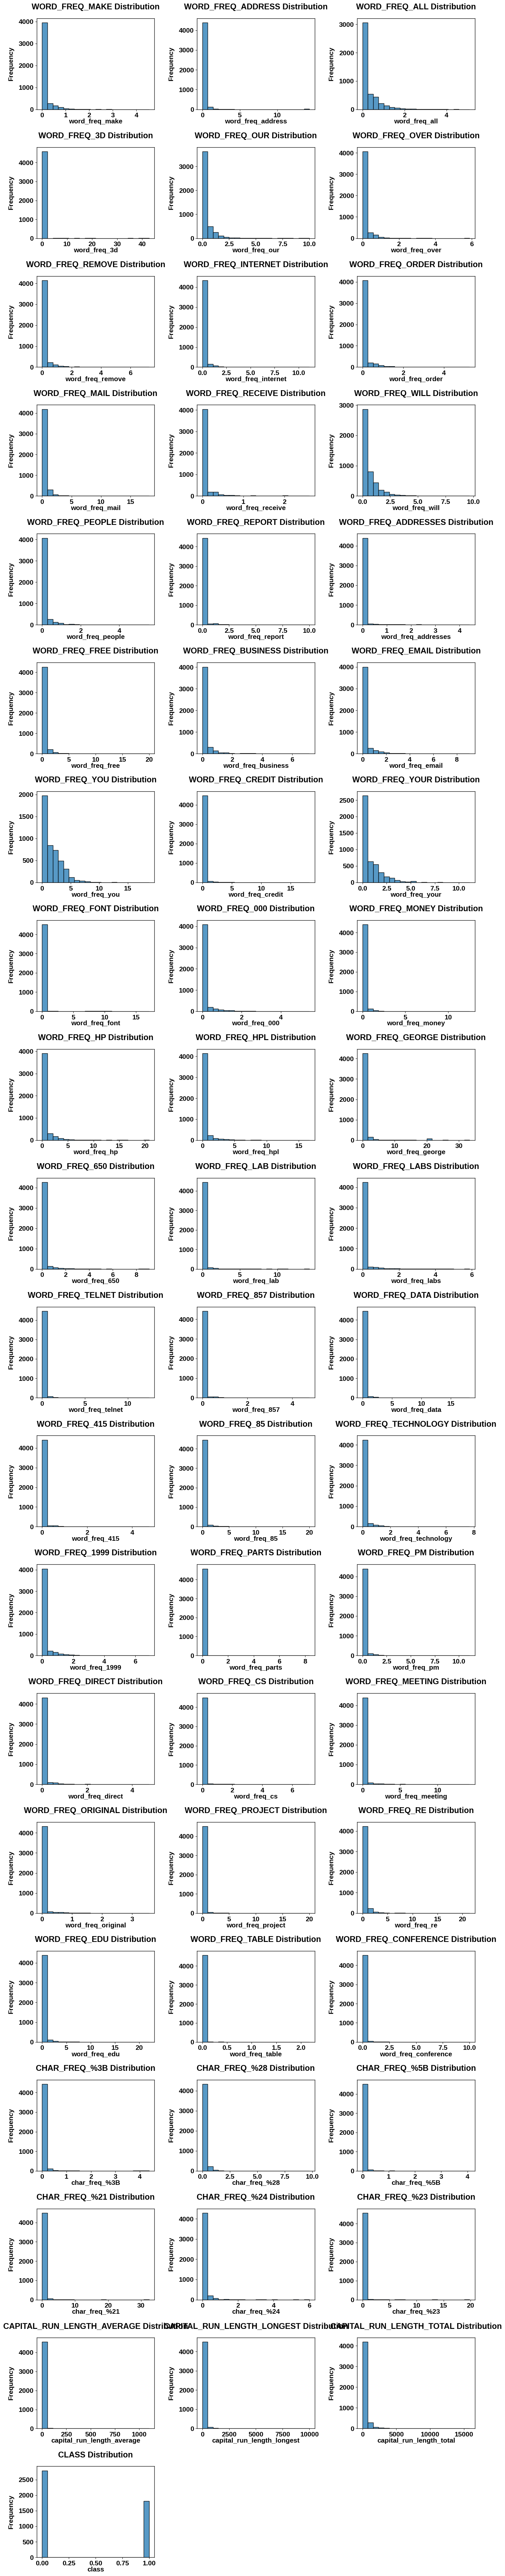

In [9]:
cols = df.columns
ncols = 3
nrows = math.ceil(len(cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
axes = axes.flatten()

bxwidth = 1

for i, col in enumerate(cols):
    sns.histplot(df[col], bins=20, ax=axes[i])
    axes[i].set_title(f"{col.upper()} Distribution", pad=20)
    axes[i].set_xlabel(col, labelpad=0)
    axes[i].set_ylabel("Frequency", labelpad=10)
    for spine in axes[i].spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=1.5, wspace=1.3)
plt.tight_layout()
plt.show()


**BoxPlot**

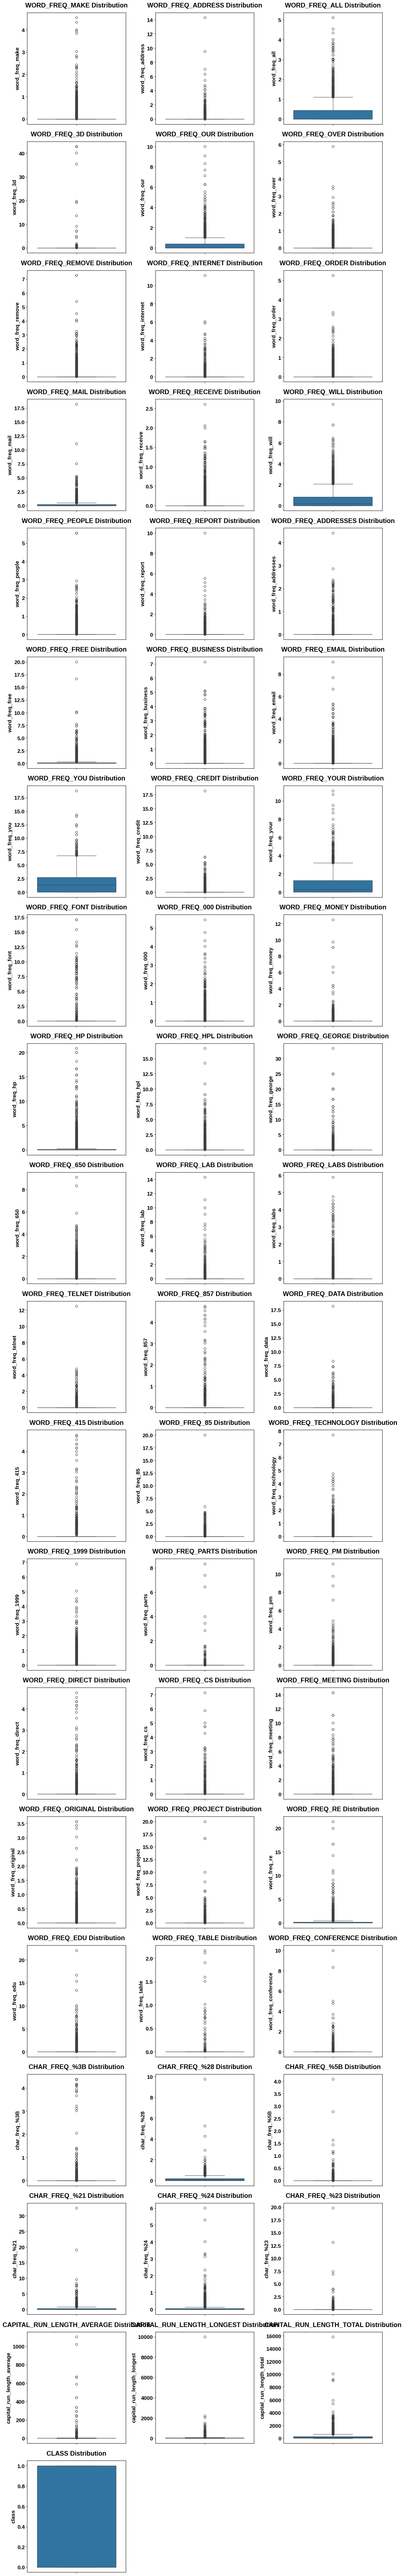

In [89]:
cols = df.columns
ncols = 3
nrows = math.ceil(len(cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

bxwidth = 1

for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"{col.upper()} Distribution", pad=15)
    axes[i].set_ylabel(col)
    for spine in axes[i].spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=1.2, wspace=0.8)
plt.tight_layout()
plt.show()


**Correlation Matrix**

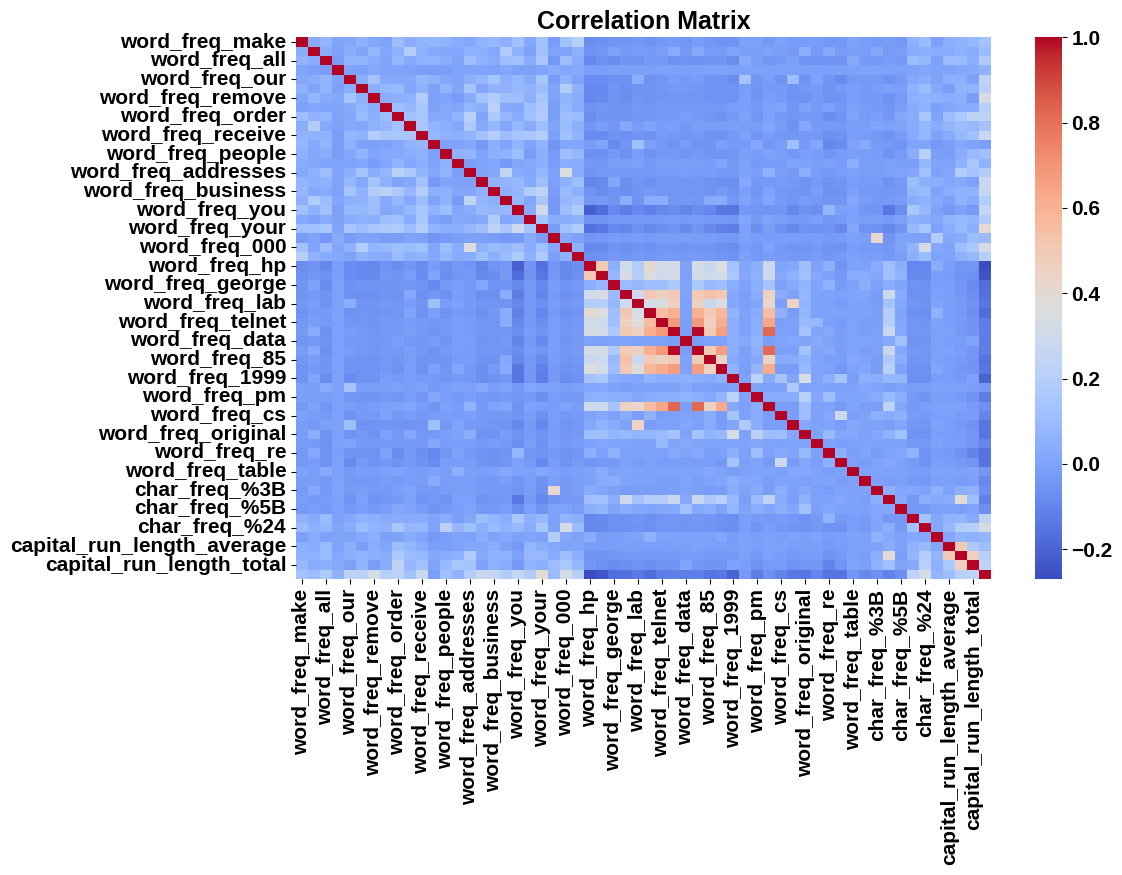

In [92]:
plt.figure(figsize=(12,9))
sns.heatmap(df[cols].corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()



**Train-Test Split**

In [12]:
X=df.drop("class",axis=1)
print(X)
y=df["class"]
print(y)


      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00     

**Scaling Data**

In [13]:
x_scaled=StandardScaler().fit_transform(df)
x_scaled

array([[-0.34243371,  0.3308849 ,  0.71285877, ...,  0.04529792,
        -0.00872413,  1.24007366],
       [ 0.3453594 ,  0.05190919,  0.43512954, ...,  0.25056283,
         1.22832407,  1.24007366],
       [-0.14592139, -0.16507191,  0.85172339, ...,  2.22110599,
         3.25873251,  1.24007366],
       ...,
       [ 0.64012787, -0.16507191,  0.03837349, ..., -0.23694133,
        -0.27262775, -0.80640371],
       [ 2.80176333, -0.16507191, -0.55676058, ..., -0.24207296,
        -0.33860365, -0.80640371],
       [-0.34243371, -0.16507191,  0.73269658, ..., -0.24207296,
        -0.40128076, -0.80640371]])

In [14]:
X=df.drop("class",axis=1)
X
y=df["class"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42,stratify=y
)

In [17]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

**Naive Bayes**

**GaussianNB**

In [93]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import time
start=time.time()
gnb=GaussianNB()
gnb.fit(X_train_scaled, y_train)
ttgnb=time.time()-start
start = time.time()
y_pred = gnb.predict(X_test_scaled)
pred_time_gnb = time.time() - start


In [19]:
print("The training time for Gaussian Naive Bayes is: ",ttgnb)

The training time for Gaussian Naive Bayes is:  0.008899688720703125


In [94]:
print("The prediction time for Gaussian Naive Bayes is: ",pred_time_gnb)

The prediction time for Gaussian Naive Bayes is:  0.011987447738647461


In [20]:
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score,
confusion_matrix, classification_report, roc_auc_score,
roc_curve, average_precision_score)

**Accuracy**

In [21]:
accuracy_score(y_test,y_pred)

0.8253692441355344

**Precision**

In [22]:
precision_score(y_test,y_pred)

0.7077175697865353

**Recall**

In [23]:
recall_score(y_test,y_pred)

0.9493392070484582

**F1 Score**

In [24]:
f1_score(y_test,y_pred)

0.8109125117591721

**Confusion Matrix**

In [75]:

print("Confusion matrix is \n",confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

specificity = tn / (tn + fp)
print("Specificity:", specificity)
false_positive_rate = fp / (fp + tn)
print("False Positive Rate:", false_positive_rate)

Confusion matrix is 
 [[645  52]
 [ 84 370]]
Specificity: 0.9253945480631277
False Positive Rate: 0.0746054519368723


**Classification Report**

In [26]:
print("Overall Report of model \n\n",classification_report(y_test,y_pred))

Overall Report of model 

               precision    recall  f1-score   support

           0       0.96      0.74      0.84       697
           1       0.71      0.95      0.81       454

    accuracy                           0.83      1151
   macro avg       0.83      0.85      0.82      1151
weighted avg       0.86      0.83      0.83      1151



**Multinomial NB**

In [27]:
start=time.time()
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
ttmnb=time.time()-start
start=time.time()
y_pred=mnb.predict(X_test)
pred_time=time.time()-start

In [28]:
print("The training time for Multinomial Naive Bayes is: ",ttmnb)

The training time for Multinomial Naive Bayes is:  0.011098146438598633


In [95]:
print("The prediction time for Multinomial Naive Bayes is: ",pred_time)

The prediction time for Multinomial Naive Bayes is:  0.2659296989440918


**Accuracy Score**

In [29]:
accuracy_score(y_test,y_pred)

0.7767158992180713

**Precision**

In [30]:
precision_score(y_test,y_pred)

0.724373576309795

**Recall**

In [31]:
recall_score(y_test,y_pred)

0.7004405286343612

**F1 Score**

In [32]:
f1_score(y_test,y_pred)

0.7122060470324748

**Confusion Matrix**

In [76]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix is \n",confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = cm.ravel()

specificity = tn / (tn + fp)
print("Specificity:", specificity)
false_positive_rate = fp / (fp + tn)
print("False Positive Rate:", false_positive_rate)

Confusion matrix is 
 [[645  52]
 [ 84 370]]
Specificity: 0.9253945480631277
False Positive Rate: 0.0746054519368723


**Classification Report**

In [34]:
print("Overall Report of model \n\n",classification_report(y_test,y_pred))

Overall Report of model 

               precision    recall  f1-score   support

           0       0.81      0.83      0.82       697
           1       0.72      0.70      0.71       454

    accuracy                           0.78      1151
   macro avg       0.77      0.76      0.76      1151
weighted avg       0.78      0.78      0.78      1151



**Bernoulli NB**

In [96]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
start=time.time()
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
ttbnb=time.time()-start
start=time.time()
y_pred = bnb.predict(X_test)
pred_time=time.time()-start

In [97]:
print("The training time for Bernoulli Naive Bayes is: ",ttbnb)

The training time for Bernoulli Naive Bayes is:  0.04684734344482422


In [98]:
print("The prediction time for Bernoulli Naive Bayes is: ",pred_time)

The prediction time for Bernoulli Naive Bayes is:  0.005849361419677734


Accuracy

In [37]:
accuracy_score(y_test,y_pred)

0.8818418766290183

**Precision**

In [38]:
precision_score(y_test,y_pred)

0.8767772511848341

**Recall**

In [39]:
recall_score(y_test,y_pred)

0.8149779735682819

**F1 Score**

In [40]:
f1_score(y_test,y_pred)

0.8447488584474886

**Confusion Matrix**

In [77]:
print("Confusion matrix is \n",confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

specificity = tn / (tn + fp)
print("Specificity:", specificity)
false_positive_rate = fp / (fp + tn)
print("False Positive Rate:", false_positive_rate)

Confusion matrix is 
 [[645  52]
 [ 84 370]]
Specificity: 0.9253945480631277
False Positive Rate: 0.0746054519368723


**Classification Report**

In [42]:
print("Overall Report of model \n\n",classification_report(y_test,y_pred))

Overall Report of model 

               precision    recall  f1-score   support

           0       0.88      0.93      0.90       697
           1       0.88      0.81      0.84       454

    accuracy                           0.88      1151
   macro avg       0.88      0.87      0.87      1151
weighted avg       0.88      0.88      0.88      1151



**ROC Curve for NaiveBayes**

In [43]:
y_prob_gnb=gnb.predict_proba(X_test_scaled)[:,1]
y_prob_mnb=mnb.predict_proba(X_test)[:,1]
y_prob_bnb=bnb.predict_proba(X_test)[:,1]

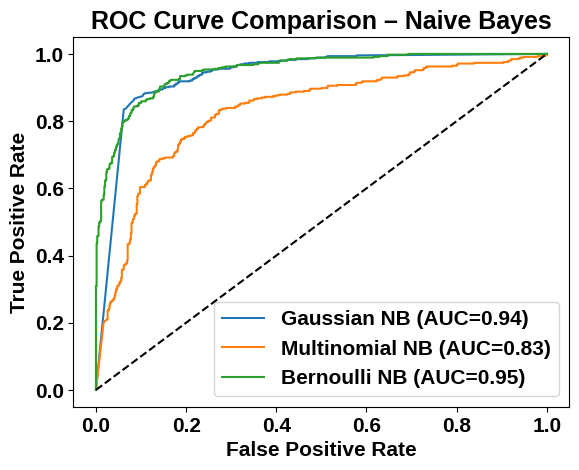

In [44]:
fpr_gnb,tpr_gnb,_=roc_curve(y_test,y_prob_gnb)
fpr_mnb,tpr_mnb,_=roc_curve(y_test,y_prob_mnb)
fpr_bnb,tpr_bnb,_=roc_curve(y_test,y_prob_bnb)
auc_gnb=auc(fpr_gnb,tpr_gnb)
auc_mnb=auc(fpr_mnb,tpr_mnb)
auc_bnb=auc(fpr_bnb,tpr_bnb)
plt.plot(fpr_gnb,tpr_gnb,label=f'Gaussian NB (AUC={auc_gnb:.2f})')
plt.plot(fpr_mnb,tpr_mnb,label=f'Multinomial NB (AUC={auc_mnb:.2f})')
plt.plot(fpr_bnb,tpr_bnb,label=f'Bernoulli NB (AUC={auc_bnb:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – Naive Bayes")
plt.legend()
plt.show()

**KNN**

**Basic Model**

In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
y_pred_knn=knn.predict(X_test_scaled)

**Accuracy vs K plot**

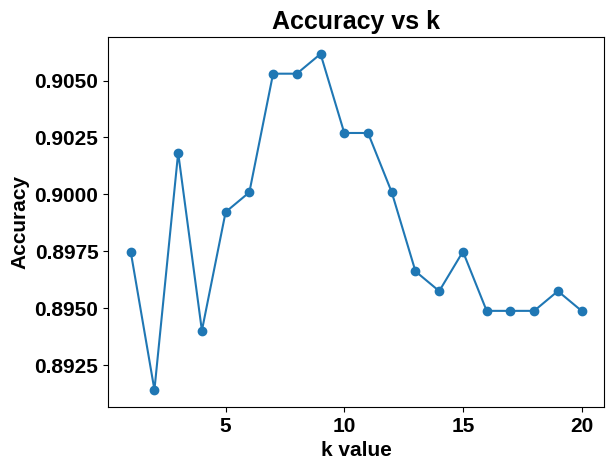

In [46]:
k_values = range(1, 21)
accuracies = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  accuracies.append(knn.score(X_test_scaled, y_test))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

**Stratified K-Fold**

In [47]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_scores_base=cross_val_score(
    knn,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='accuracy'
)
print("Base KNN CV Accuracy:",cv_scores_base.mean())



Base KNN CV Accuracy: 0.8884057971014494


**Grid Search**

In [78]:
param_grid = {
    'n_neighbors': list(range(1, 31, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    knn,
    param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

best_k = grid.best_params_['n_neighbors']

print("Grid Best Params:", grid.best_params_)
print("Best k (n_neighbors):", best_k)
print("Grid Best CV Accuracy:", grid.best_score_)

Grid Best Params: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Best k (n_neighbors): 13
Grid Best CV Accuracy: 0.9240579710144928


**Randomized Search**

In [87]:
from scipy.stats import randint
param_dist={
    'n_neighbors':randint(1,30),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
rand=RandomizedSearchCV(
    knn,
    param_distributions=param_dist,
    n_iter=15,
    cv=skf,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
rand.fit(X_train_scaled,y_train)
best_k = rand.best_params_['n_neighbors']
print("Random Best Params:",rand.best_params_)
print("Best k (n_neighbors):", best_k)
print("Random Best CV Accuracy:",rand.best_score_)

Random Best Params: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best k (n_neighbors): 6
Random Best CV Accuracy: 0.9249275362318841


**Final KNN Model**

In [80]:
best_params=rand.best_params_
knn_final=KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'],
    metric=best_params['metric']
)
knn_final.fit(X_train_scaled,y_train)
y_pred_final=knn_final.predict(X_test_scaled)

**Metrics**

In [81]:
from sklearn.metrics import confusion_matrix,roc_curve,auc
def compute_metrics(y_true,y_pred):
    cm=confusion_matrix(y_true,y_pred)
    tn,fp,fn,tp=cm.ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1=2*precision*recall/(precision+recall)
    specificity=tn/(tn+fp)
    fpr=fp/(fp+tn)
    return accuracy,precision,recall,f1,specificity,fpr,cm

In [82]:
start=time.time()
knn_final.fit(X_train_scaled,y_train)
train_time=time.time()-start

start=time.time()
y_pred_knn=knn_final.predict(X_test_scaled)
pred_time=time.time()-start
acc,prec,rec,f1,spec,fpr,cm=compute_metrics(y_test,y_pred_knn)
print("Final KNN Metrics")
print("Accuracy:",acc)
print("Precision:",prec)
print("Recall:",rec)
print("F1 Score:",f1)
print("Specificity:",spec)
print("False Positive Rate:",fpr)
print("Training Time:",train_time)
print("Prediction Time:",pred_time)


Final KNN Metrics
Accuracy: 0.9209383145091226
Precision: 0.9172413793103448
Recall: 0.8788546255506607
F1 Score: 0.8976377952755905
Specificity: 0.9483500717360115
False Positive Rate: 0.05164992826398852
Training Time: 0.0029807090759277344
Prediction Time: 0.2659296989440918


**Confusion Matrix – Final KNN**

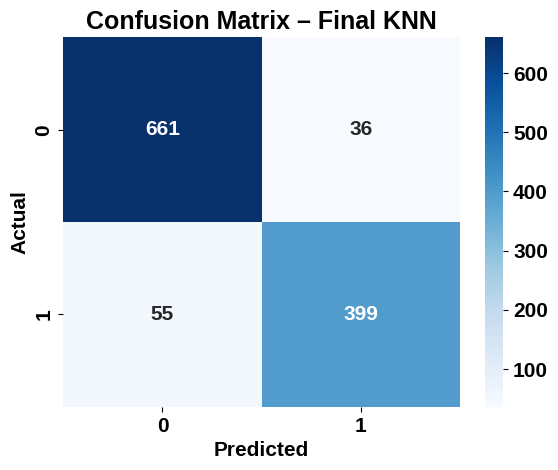

In [83]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix – Final KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**ROC Curve for KNN**

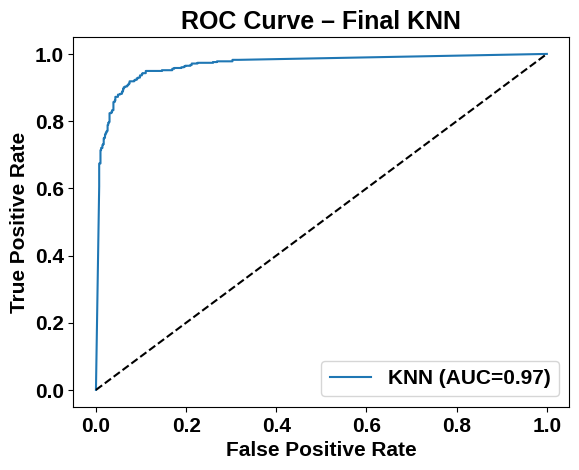

In [84]:
y_prob_knn=knn_final.predict_proba(X_test_scaled)[:,1]
fpr_knn,tpr_knn,_=roc_curve(y_test,y_prob_knn)
auc_knn=auc(fpr_knn,tpr_knn)
plt.plot(fpr_knn,tpr_knn,label=f'KNN (AUC={auc_knn:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Final KNN")
plt.legend()
plt.show()

In [85]:
best_params=rand.best_params_
optimal_k=best_params['n_neighbors']
optimal_k

6

**KDTree**

In [56]:
start=time.time()
knn_kd=KNeighborsClassifier(
    n_neighbors=optimal_k,
    weights=best_params['weights'],
    metric=best_params['metric'],
    algorithm='kd_tree'
)
knn_kd.fit(X_train_scaled,y_train)
train_time_kd=time.time()-start
start=time.time()
y_pred_kd=knn_kd.predict(X_test_scaled)
pred_time_kd=time.time()-start

**Metrics**

In [57]:
acc_kd,prec_kd,rec_kd,f1_kd,sp,fpr,cm=compute_metrics(y_test,y_pred_kd)
print("Final KDtree Metrics")
print("Accuracy:",acc_kd)
print("Precision:",prec_kd)
print("Recall:",rec_kd)
print("F1 Score:",f1_kd)
print("Specificity:",sp)
print("False Positive Rate:",fpr)
print("Training Time:",train_time)
print("Prediction Time:",pred_time)

Final KDtree Metrics
Accuracy: 0.9209383145091226
Precision: 0.9172413793103448
Recall: 0.8788546255506607
F1 Score: 0.8976377952755905
Specificity: 0.9483500717360115
False Positive Rate: 0.05164992826398852
Training Time: 0.007390022277832031
Prediction Time: 0.6574018001556396


**BallTree**

In [58]:
start=time.time()
knn_bt=KNeighborsClassifier(
    n_neighbors=optimal_k,
    weights=best_params['weights'],
    metric=best_params['metric'],
    algorithm='ball_tree'
)
knn_bt.fit(X_train_scaled,y_train)
train_time_bt=time.time()-start
start=time.time()
y_pred_bt=knn_bt.predict(X_test_scaled)
pred_time_bt=time.time()-start

**Metrics**

In [59]:
acc_bt,prec_bt,rec_bt,f1_bt,sp,fpr,cm=compute_metrics(y_test,y_pred_bt)
print("Final Balltree Metrics")
print("Accuracy:",acc_bt)
print("Precision:",prec_bt)
print("Recall:",rec_bt)
print("F1 Score:",f1_bt)
print("Specificity:",sp)
print("False Positive Rate:",fpr)
print("Training Time:",train_time)
print("Prediction Time:",pred_time)

Final Balltree Metrics
Accuracy: 0.9209383145091226
Precision: 0.9172413793103448
Recall: 0.8788546255506607
F1 Score: 0.8976377952755905
Specificity: 0.9483500717360115
False Positive Rate: 0.05164992826398852
Training Time: 0.007390022277832031
Prediction Time: 0.6574018001556396


**Training vs Validation**

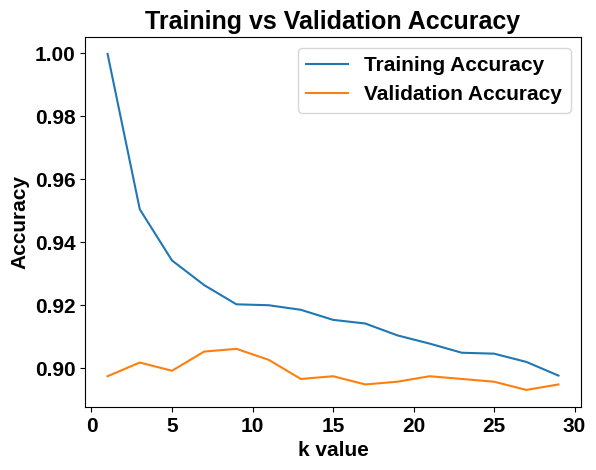

In [60]:
train_acc=[]
val_acc=[]
k_values=range(1,31,2)
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    train_acc.append(knn.score(X_train_scaled,y_train))
    val_acc.append(knn.score(X_test_scaled,y_test))
plt.plot(k_values,train_acc,label='Training Accuracy')
plt.plot(k_values,val_acc,label='Validation Accuracy')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

**Cross Validation Scores**

In [61]:
gnb_scores=cross_val_score(
    GaussianNB(),
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)

In [62]:
mnb_scores=cross_val_score(
    MultinomialNB(),
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)

In [63]:
bnb_scores=cross_val_score(
    BernoulliNB(),
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)


In [64]:
knn_kd_scores=cross_val_score(
    knn_kd,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='accuracy'
)

In [65]:
knn_bt_scores=cross_val_score(
    knn_bt,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='accuracy'
)

**One way ANOVA Test**

In [66]:
from scipy.stats import f_oneway
F_stat,p_value=f_oneway(
    gnb_scores,
    mnb_scores,
    bnb_scores,
    knn_kd_scores,
    knn_bt_scores
)

print("F-statistic:",F_stat)
print("p-value:",p_value)

F-statistic: 129.55561719833642
p-value: 5.3351897599106044e-14


**Mean Accuracy to find the best model**

In [67]:
print("Gaussian NB Mean Accuracy:",gnb_scores.mean())
print("Multinomial NB Mean Accuracy:",mnb_scores.mean())
print("Bernoulli NB Mean Accuracy:",bnb_scores.mean())
print("KNN KDTree Mean Accuracy:",knn_kd_scores.mean())
print("KNN BallTree Mean Accuracy:",knn_bt_scores.mean())

Gaussian NB Mean Accuracy: 0.8194202898550724
Multinomial NB Mean Accuracy: 0.7869565217391304
Bernoulli NB Mean Accuracy: 0.884927536231884
KNN KDTree Mean Accuracy: 0.9249275362318841
KNN BallTree Mean Accuracy: 0.9249275362318841


In [68]:
best_model=max(
    [
        ("Gaussian NB",gnb_scores.mean()),
        ("Multinomial NB",mnb_scores.mean()),
        ("Bernoulli NB",bnb_scores.mean()),
        ("KNN KDTree",knn_kd_scores.mean()),
        ("KNN BallTree",knn_bt_scores.mean())
    ],
    key=lambda x:x[1]
)

print("Best Model:",best_model)

Best Model: ('KNN KDTree', np.float64(0.9249275362318841))
